## Notebook for the development of Split_Read.py

In [10]:
# First lets import some stuff and add some "magic commands"
%load_ext autoreload 
#automatically reloads scripts so I dont have to refresh the Kernel
%matplotlib inline
# Makes my pltos inline justified - apparently this makes them "better"
import obspy 
import pandas as pd 
import numpy as np 
import matplotlib as plt
import obspy.core
from obspy.clients.fdsn import Client
from obspy.taup import TauPyModel
from obspy.clients.fdsn.header import FDSNException

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
print(sys.version)
print(sys.executable)

3.6.3 | packaged by conda-forge | (default, Oct  5 2017, 19:18:17) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
/anaconda3/envs/obspy/bin/python


In [3]:
obspy.core.util.version

<module 'obspy.core.util.version' from '/anaconda3/envs/obspy/lib/python3.6/site-packages/obspy/core/util/version.py'>

In [5]:
data = pd.read_csv("Jacks_SKS_RAW.txt",delim_whitespace=True)


In [5]:
num_splits = data[data.AUTOQC == 'split' ]['STAT'].value_counts()
num_splits.index[0]

'NEW'

In [4]:
data.columns

Index(['DATE', 'TIME', 'EVLA', 'EVLO', 'STLA', 'STLO', 'EVDP', 'DIST', 'AZI',
       'BAZ', 'FAST', 'DFAST', 'TLAG', 'DTLAG', 'SPOL', 'DSPOL', 'WBEG',
       'WEND', 'STAT', 'EIGORIG', 'EIGCORR', 'Q', 'SNR', 'NDF', 'AUTOQC'],
      dtype='object')

In [7]:
split1 = data[(data['STAT'] == "NEW") & (data['AUTOQC'] =="split") ]

### This appear to be the best way to parse the data that we want (Observations from AAM where splitting was observ
split1 = split1.reset_index()
del split1['index'] # Resets the indexing of the rows to make them easier to find 
ps_date = str(split1.DATE[4]) #Isolates one Date entry to be passed to the next part of the script 
ps_time = str(split1.TIME[4]).zfill(4) # Isolates one Time entry to be passed
print(ps_date)
print(ps_time)
# if len(ps_time) == 3:
#     ps = ps_date + "T" + "0" + ps_time # Combines to give the UTCDate string of former "yyyy ddd T hh mm" [without whitespaces]
# elif len(ps_time) == 2:
#     ps = ps_date + "T" + "0" + ps_time[0] + "0" + ps_time[1]
# else:
ps = ps_date + "T" + ps_time
start = obspy.core.UTCDateTime(ps) #iso8601=True
# model = TauPyModel(model="iasp91") # Creates a model class based on iasp91 
# model.get_travel_times(source_depth_in_km = split1.EVDP[4],distance_in_degree = split1.DIST[6],
#                                   phase_list = ["SKS"]) 
# Generates the SKS arrival time based upon the listed epcentral distance (DIST) and event depth (EVDP) using the model iasp91
start.second

1995113
0508


0

In [7]:
client = Client("IRIS")
    # test_start = obspy.core.UTCDateTime("2008-02-15T04:30:0.000")
st = obspy.core.stream.Stream()
    
test_00 = obspy.core.UTCDateTime("2011-05-02T19:07:00") # This Criterion is ONLY for AAM
if start >= test_00:
    # Location "00" for AAM went live at 2011/05/02 (122) 19:07:00 
    loc = "00"
else:
    loc = "--"

st = client.get_waveforms("US","NEW",loc,"BH?",start,start + 3600,attach_response=True)

In [8]:
ps

'1995113T0508'

In [9]:
#client.get_waveforms("US","AAM",loc,"*",start+2000,start + 2200,attach_response=True)

In [10]:
start

1995-04-23T05:08:00.000000Z

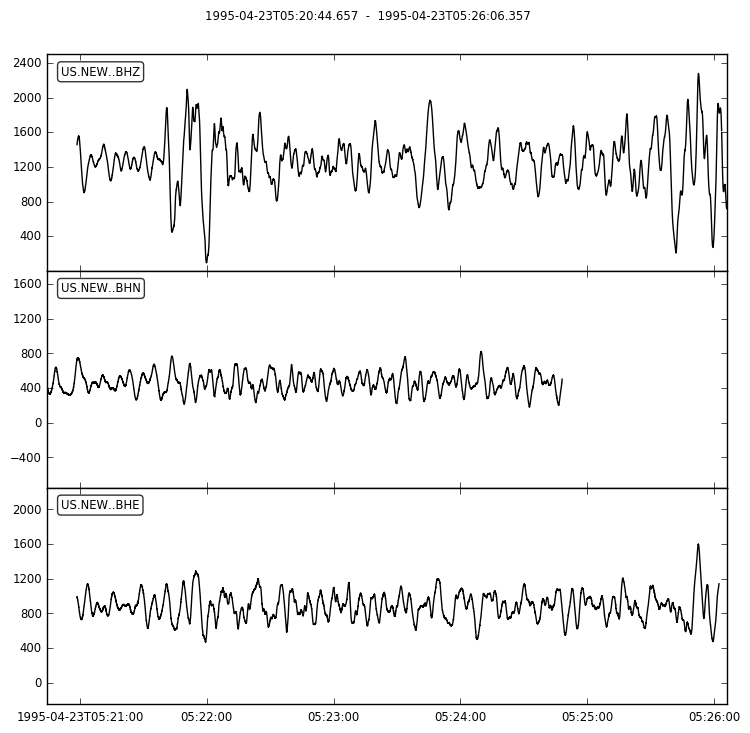

In [11]:
st.plot()

In [12]:
split1

,DATE,TIME,EVLA,EVLO,STLA,STLO,EVDP,DIST,AZI,BAZ,...,DSPOL,WBEG,WEND,STAT,EIGORIG,EIGCORR,Q,SNR,NDF,AUTOQC
0,1995078,2353,-4.18,135.11,48.26,-117.12,33.0,104.91,41.18,280.62,...,0.04,1478.25,1509.08,NEW,0.0293,0.0008,0.016,38.928,14,split
1,1995110,845,6.28,126.78,48.26,-117.12,94.0,102.20,37.87,294.03,...,0.49,1449.07,1489.90,NEW,0.1344,0.0086,0.762,12.847,22,split
2,1995111,9,12.01,125.66,48.26,-117.12,20.0,98.35,36.91,298.43,...,0.02,1452.85,1474.52,NEW,0.0623,0.0002,0.033,58.831,25,split
3,1995111,517,12.05,125.92,48.26,-117.12,27.0,98.16,36.99,298.25,...,0.26,1453.82,1480.49,NEW,0.1018,0.0052,0.489,14.517,15,split
4,1995113,508,12.39,125.40,48.26,-117.12,24.0,98.20,36.79,298.87,...,0.38,1443.31,1480.81,NEW,0.1170,0.0086,0.287,14.621,20,split
5,1995124,218,1.89,128.48,48.26,-117.12,23.0,104.57,38.96,289.87,...,0.45,1472.73,1510.23,NEW,0.0583,0.0079,-0.240,11.342,23,split
6,1995125,353,12.63,125.30,48.26,-117.12,16.0,98.07,36.74,299.09,...,0.01,1455.21,1480.21,NEW,0.0674,0.0003,0.832,71.337,15,split
7,1995128,1808,11.47,125.96,48.26,-117.12,12.0,98.60,37.05,297.87,...,0.20,1457.63,1480.13,NEW,0.0520,0.0032,-0.231,16.866,24,split
8,1995136,335,36.46,70.89,48.26,-117.12,187.0,95.35,5.37,353.52,...,0.06,1395.66,1423.99,NEW,0.0408,0.0010,0.826,36.114,25,split
9,1995261,656,-6.93,128.97,48.26,-117.12,181.0,110.98,40.86,283.58,...,0.07,1474.24,1504.24,NEW,0.0592,0.0012,0.381,30.300,26,split


## Combining the above work to create a loop that downloads the traces for all instances of splitting observed at AAM

In [13]:
split1 = data[(data['STAT'] == "NEW") & (data['AUTOQC'] =="split") ]

### This appear to be the best way to parse the data that we want (Observations from AAM where splitting was observ
split1 = split1.reset_index()
del split1['index'] # Resets the indexing of the rows to make them easier to find 
expected_traces = split1.shape[0]*3
##################### Start of Loop Work ##################
st = obspy.core.stream.Stream() # Initialises our stream variable 
client = Client("IRIS")
SKS_time = np.zeros(split1.shape[0])
from obspy.clients.fdsn.header import (FDSNException)
for i in range(0, (split1.shape[0])): # split1.shape[0] returns the number of rows in split1
    print("This is event ", i + 1, " of ", split1.shape[0])
    ps_date = str(split1.DATE[i]) #Isolates one Date entry to be passed to the next part of the script 
    ps_time = str(split1.TIME[i]) # Isolates one Time entry to be passed
    if len(ps_time) == 3:
         ps = ps_date + "T" + "0" + ps_time # Combines to give the UTCDate string of former "yyyy ddd T hh mm" [without whitespaces]
    elif len(ps_time) == 2:
        ps = ps_date + "T" + "00" + ps_time
    elif len(ps_time) == 1:
        ps = ps_date + "T" + "000" + ps_time
    else:
        ps = ps_date + "T" + ps_time
#     print("i =", i, ps)
    start = obspy.core.UTCDateTime(ps) #iso8601=True
    model = TauPyModel(model="iasp91") # Creates a model class based on iasp91 
    arrival = model.get_travel_times(source_depth_in_km = split1.EVDP[i],distance_in_degree = split1.DIST[6],phase_list = ["SKS"]) 
    SKS_time[i] = arrival[0].time 
# Generates the SKS arrival time based upon the listed epcentral distance (DIST) and event depth (EVDP) using the model iasp91
  
    test_00 = obspy.core.UTCDateTime("2011-05-02T19:07:00") # This Criterion is ONLY for AAM ( Update - very similar for NEW so I will keep it)
    if start >= test_00:
     # Location "00" for AAM went live at 2011/05/02 (122) 19:07:00 
        loc = "10"
        channel = "BH?"
    elif start < obspy.core.UTCDateTime("2000-01-01T00:00:00"):
        loc = "--"
        channel = "BH?"
    else:
        loc = "--"
        channel = "BH?"
    
    try:
        st = client.get_waveforms("US","NEW",loc,channel,start,start + 2400,attach_response=True)
    except FDSNException:
        print("No data available")
    
    

This is event  1  of  101
This is event  2  of  101
This is event  3  of  101
This is event  4  of  101
No data available
This is event  5  of  101
This is event  6  of  101
This is event  7  of  101
No data available
This is event  8  of  101
No data available
This is event  9  of  101


KeyboardInterrupt: 

In [6]:
## Trial for Exception Catching 
import obspy 
from obspy import UTCDateTime, read_inventory
from obspy.clients.fdsn.header import (FDSNException)
try : 
    print("Can you Catch Me?")
    raise FDSNException("Test")
except FDSNException:
    print("Yes I Can")

ModuleNotFoundError: No module named 'obspy'

In [ ]:
k = 0
st_comp = obspy.core.stream.Stream()

for i in range(0, len(st)):
    if ((st[i].stats.endtime - st[i].stats.starttime) < 2399.0) : # Isolates all the traces which are shorter than the requested time period and therefore need to be patched together
        k = k + 1
#         print(st[i])
    else:

        st_comp +=  st[i] 
#print(k)
#print(st_comp.__str__(extended=True))
#st_comp[27:30].plot()

# st_broad

In [ ]:
SKS_time

In [ ]:
print(st_comp.__str__(extended=True))

In [ ]:
a = st[9].stats.starttime  # BHE
b = st[17].stats.starttime # BHE TRaces for 1998-2-7 event
c = st[18].stats.starttime # BHN
d = st[26].stats.starttime # BHN Traces for 1998-2-7 Event
e = st[27].stats.starttime # BHZ
f = st[35].stats.starttime # BHZ Traces for 1998-2-7 event
g = st[42].stats.starttime # BHE 
h = st[46].stats.starttime # BHE Traces for 1998 -5-15 event


x = st[1].stats.endtime - st[1].stats.starttime

display(a,b,c,d,e,f,g,h,x)

In [ ]:
print(st.__str__(extended=True)) # Prints all traces in the stream (theres a lot)

### For now we are only interested in getting stuff to work. So I am going to ignore the awkward long period stuff and the broken up Broadband traces 

In [ ]:
import obspy.signal.filter as filt
## Use variable st_broad as it only contains the good broadband traces
# These traces are from the last 3 events which were detected with splitting at AAM. AKA events 7 - 10 (indexed as 6-9 or 6-10)
# For now we will just use traces from the LAST EVENT, event 10 (index 9)
s_filt = obspy.core.stream.Stream()
s_filt = filt.bandpass(st_broad[6:10],freqmin=0.01, freqmax= 0.1,df = st[70].stats.sampling_rate,corners=2,zerophase=True)

In [ ]:
st_2 = st_comp[2:5].copy()
st_2.filter("bandpass",freqmin=0.01, freqmax= 0.1,corners=2,zerophase=True)
t0 = st_2[0].stats.starttime
st_2.plot(type = 'relative', starttime = t0+1300, endtime = t0+1600)
# st_broad[6:9].filter("bandpass",freqmin=0.01,freqmax=0.1)


In [ ]:
st_2

In [ ]:
import matplotlib.pyplot as plt
t = np.arange(0, st_broad[6].stats.npts / st_broad[6].stats.sampling_rate, st_broad[6].stats.delta)# time for x-axis

f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.set(title = st_broad[6].stats.starttime,ylabel= "BHE")
ax1.plot(t,s_filt[2],'k') # Bottom Axes 

ax2.plot(t, s_filt[1],'k') # Middle Axes

ax3.plot(t, s_filt[0],'k') #Top Axis
f.subplots_adjust(hspace = 0)

plt.xlim(SKS_time[9] - 240, SKS_time[9] + 240)
plt.yticks(np.arange(-600,601,300))
plt.ylim(-750,750)

In [ ]:
start_1 = obspy.core.UTCDateTime(st[6].stats.starttime + SKS_time[9] - 120)
st_broad[6:10].plot(starttime = start_1, endtime = start_1 + 180)

In [ ]:
print(arr)


arrivals = model.get_travel_times(source_depth_in_km=100,distance_in_degree=45, phase_list=["P", "PSPSPS"])
print(arrivals)  
arr2 = arrivals[0]
arr2.time

In [ ]:
arr[0].time # Need to index in order to find arrival times 

In [ ]:
t = obspy.core.UTCDateTime(st[0].stats.starttime, precision = 0)
yr = str(t.year) # converts year to a string
mon = str(t.month).zfill(2)
day = str(t.day).zfill(2)
hour = str(t.hour).zfill(2)
min = str(t.minute).zfill(2)
sec = str(t.second).zfill(2)


    
t_id = yr + "_" + mon + "_" + day + "_" + hour + "_" + min + "_" + sec 
print(t_id)
#time_id = print("_",t.year,"_",t.month,"_") # t.day + "_" + t.hour + "_" + t.minute  + "_" + t.second

In [ ]:
str(0)

In [ ]:
string = "test"

In [ ]:
test = obspy.core.read('NEW500.sac')
test.plot()

In [ ]:
stream = obspy.core.read('NEW*.sac')

In [ ]:
print(stream.__str__(extended=True))

In [ ]:
obspy.core.UTCDateTime(start + 1300)

In [ ]:
import os.path 
os.path.isfile('NEW_BHE_*.sac')

In [ ]:
import glob

In [ ]:
lst = glob.glob('*.sac')
lst
i = 1 
for file in lst:
    if os.path.isfile(file) == True:
        print("The ", i, "th file exists. Lets do stuff")
        print(file)
        i = i + 1
    

#### Trial Function (in preparation for making part of Split_read.py a function)

In [ ]:
def thisisatest(a,b):
    c = b + a 
    return a,b,c 
    print("This is a test function. The variable c =",c ,"!!")

x,y,z = thisisatest(1,2)



In [ ]:

# dist = split1.DIST
# depth = split1.EVDP
# SKS_time = np.zeros(len(dist))
# for i in range(0,len(dist)):
#     model = obspy.taup.tau.TauPyModel(model="iasp91") # Creates a model class based on iasp91
#     arrival = model.get_travel_times(depth[i],dist[i],['SKS'])
#     SKS_time[i] = arrival[0].time
# print(SKS_time)


### Lets try filtering saved traces from Split_Read.py (25/10/17) and search for those elusive SKS waves and splitting

         network: US
         station: NEW
        location: 
         channel: BHE
       starttime: 2008-11-16T17:02:00.000000Z
         endtime: 2008-11-16T17:52:00.000000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 120001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.025, 'depmin': -10284.0, 'depmax': 9120.0, 'scale': 1.0, 'b': 0.0, 'e': 3000.0, 'depmen': -226.94685, 'nzyear': 2008, 'nzjday': 321, 'nzhour': 17, 'nzmin': 2, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 120001, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'NEW', 'kcmpnm': 'BHE', 'knetwk': 'US'})


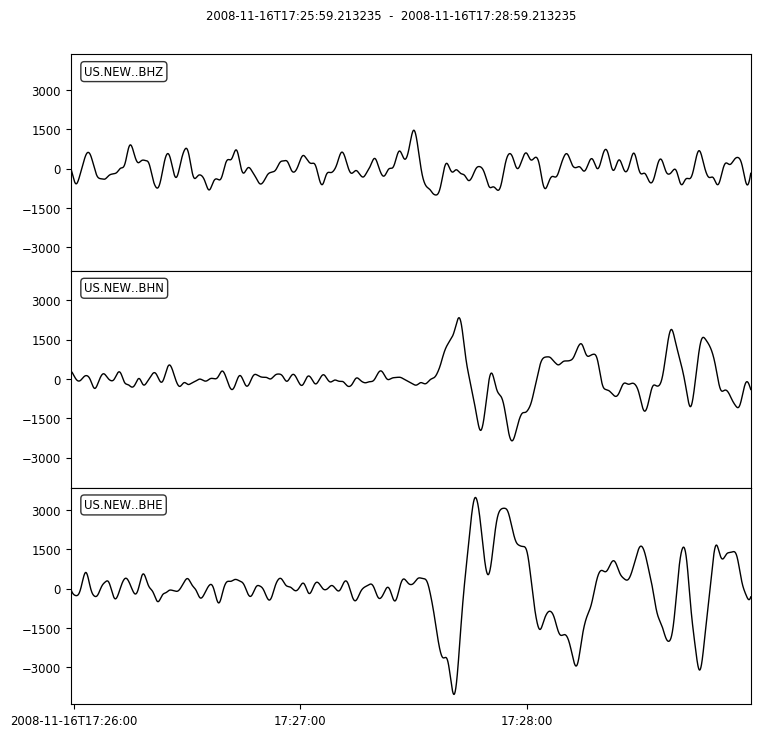

3 Trace(s) in Stream:
US.NEW..BHE | 2008-11-16T17:25:59.225000Z - 2008-11-16T17:28:59.225000Z | 40.0 Hz, 7201 samples
US.NEW..BHN | 2008-11-16T17:25:59.225000Z - 2008-11-16T17:28:59.225000Z | 40.0 Hz, 7201 samples
US.NEW..BHZ | 2008-11-16T17:25:59.225000Z - 2008-11-16T17:28:59.225000Z | 40.0 Hz, 7201 samples

In [9]:
st = obspy.core.stream.read("NEW_80_BH?.sac")
# st += obspy.core.stream.read("NEW_80_BHE.sac")

print(st[0].stats)
model = obspy.taup.tau.TauPyModel(model="iasp91") # Creates a model class based on iasp91
arrival = model.get_travel_times(source_depth_in_km = split1.EVDP[80],distance_in_degree = split1.DIST[80],phase_list = ["SKS"])
SKS = arrival[0].time
st.filter("bandpass",freqmin=0.01, freqmax= 0.5,corners=2,zerophase=True)
t0 = obspy.core.utcdatetime.UTCDateTime(st[0].stats.starttime + SKS)
st.plot( starttime = t0 - 60, endtime = t0+120)
st.trim(starttime = t0 - 60, endtime = t0+120)

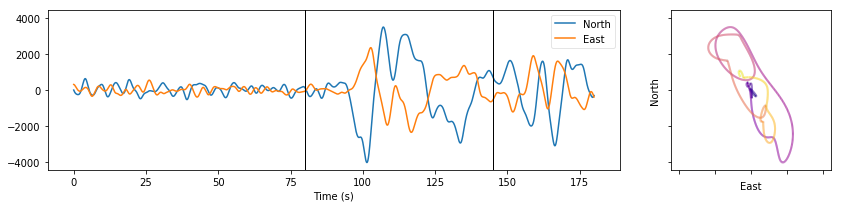

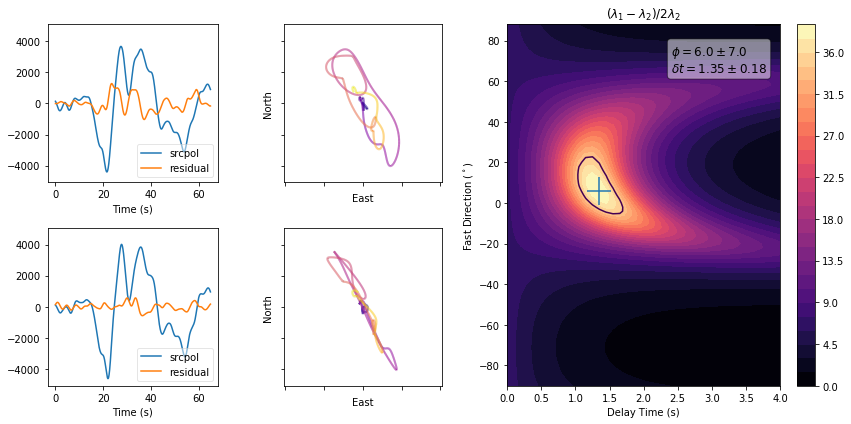

In [10]:
import splitwavepy as sw


#st.trim(t0 + 15, t0 + 50)
north = st[0].data
east = st[1].data
sample_interval = st[0].stats.delta
split = sw.Pair(north, east, delta=sample_interval)
split.set_window(80, 145)

split.plot()

measure = sw.EigenM(split,lags=(4,))
measure.plot(Marker=True, Conf95=True)


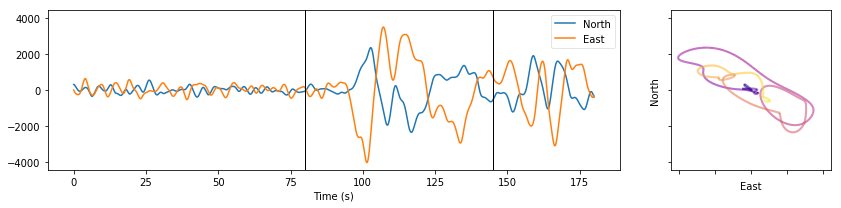

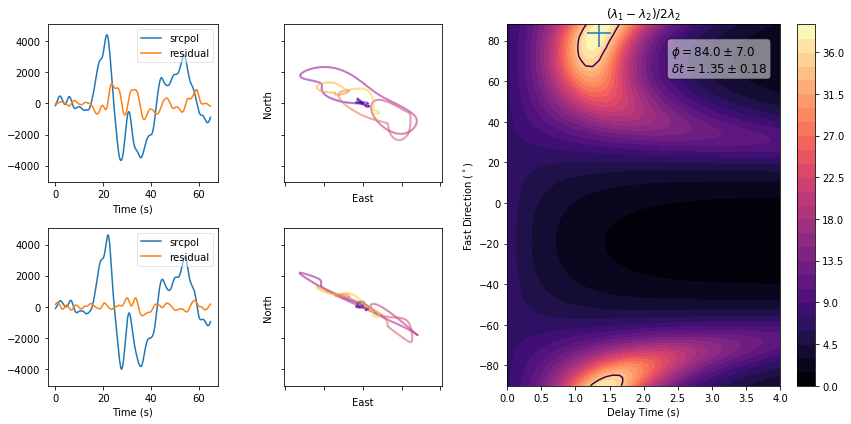

In [11]:

#st.trim(t0 + 15, t0 + 50)
north = st[1].data
east = st[0].data
z = st[2].data
sample_interval = st[0].stats.delta
split = sw.Pair(north, east, delta=sample_interval)
split.set_window(80, 145)

split.plot()

measure = sw.EigenM(split,lags=(4,))
measure.plot(Marker=True, Conf95=True)

In [42]:
st[1]

US.NEW..BHN | 2008-11-16T17:25:59.225000Z - 2008-11-16T17:28:59.225000Z | 40.0 Hz, 7201 samples

In [41]:
st[1].stats

         network: US
         station: NEW
        location: 
         channel: BHE
       starttime: 2008-11-16T17:25:59.225000Z
         endtime: 2008-11-16T17:28:59.225000Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 7201
           calib: 1.0
         _format: SAC
      processing: ["ObsPy 1.0.3: filter(options={'freqmin': 0.01, 'freqmax': 0.5, 'corners': 2, 'zerophase': True}::type='bandpass')", 'ObsPy 1.0.3: trim(endtime=UTCDateTime(2008, 11, 16, 17, 28, 59, 225000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2008, 11, 16, 17, 25, 59, 225000))']
             sac: AttribDict({'delta': 0.025, 'depmin': -10284.0, 'depmax': 9120.0, 'scale': 1.0, 'b': 0.0, 'e': 3000.0, 'depmen': -226.94685, 'nzyear': 2008, 'nzjday': 321, 'nzhour': 17, 'nzmin': 2, 'nzsec': 0, 'nzmsec': 0, 'nvhdr': 6, 'npts': 120001, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'NEW', 'kcmpnm': 'BHE', 'knetwk': 'US'})

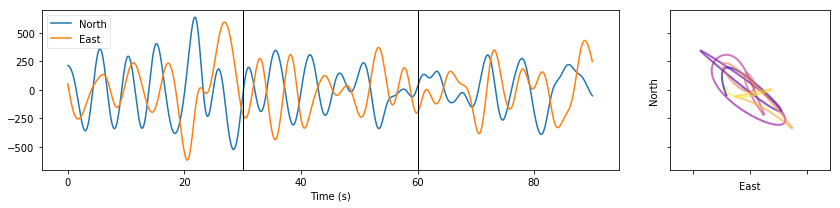

None


In [14]:
import splitwavepy as sw
st = obspy.core.stream.read("NEW_40_BHN.sac")
st += obspy.core.stream.read("NEW_40_BHE.sac")
#print(st[0].stats)
model = obspy.taup.tau.TauPyModel(model="iasp91") # Creates a model class based on iasp91
arrival = model.get_travel_times(split1.EVDP[40],split1.DIST[40],["SKS"])
SKS = arrival[0].time
st.filter("bandpass",freqmin=0.02, freqmax= 0.3,corners=2,zerophase=True)
t0 = obspy.core.utcdatetime.UTCDateTime(st[0].stats.starttime + SKS)

#st.plot( starttime = t0 - 60, endtime = t0+120)
st.trim(t0 - 15 , t0 + 75)
north = st[0].data
east = st[1].data
sample_interval = st[0].stats.delta
data = sw.Pair(north, east, delta=sample_interval)
fig =  data.plot()



data.wbeg()
# measure = sw.EigenM(data)
# measure.plot(Marker=True, Conf95=True)


In [16]:
window = [ data.wbeg(), data.wend()]
print(window)

[30.0, 60.0]


In [ ]:
st3 = obspy.core.stream.read("NEW_99_BHN.sac")
st3 += obspy.core.stream.read("NEW_99_BHE.sac")
# print(st3[0].stats)
model = obspy.taup.tau.TauPyModel(model="iasp91") # Creates a model class based on iasp91
arrival = model.get_travel_times(source_depth_in_km = split1.EVDP[99],distance_in_degree = split1.DIST[99],phase_list = ["SKS"])
SKS = arrival[0].time
filt = st3.filter("bandpass",freqmin=0.01, freqmax= 0.1,corners=2,zerophase=True)
t0 = obspy.core.utcdatetime.UTCDateTime(st[0].stats.starttime + SKS)

#st.plot( starttime = t0 - 60, endtime = t0+120)
st3.trim(t0 , t0 + 90)
north = st3[0].data
east = st3[1].data
sample_interval = st[0].stats.delta
split = sw.Pair(north, east, delta=sample_interval)
split.plot()


measure = sw.EigenM(split)
measure.plot(Marker=True, Conf95=True)



In [ ]:
st3= obspy.core.stream.read("NEW_99_BHN.sac")
st3

In [ ]:
chanel = ["A","B","C"]
for ch in chanel:
    print("Now downloading channel:", ch)

### Testing get_events to download more accurate event times

In [18]:
client = obspy.clients.fdsn.Client("IRIS")
cat = client.get_events(starttime=start-300,endtime = start+300)

In [7]:
print(cat[0].origins[0].time.second)
print(cat[0].origins[0].time.minute)
print(cat[0].origins[0].time.microsecond)

58
7
60000


In [8]:
print(start)
start.second = cat[0].origins[0].time.second
start.minute = cat[0].origins[0].time.minute
start.microsecond = cat[0].origins[0].time.microsecond

1995-04-23T05:08:00.000000Z


In [21]:
cat

3 Event(s) in Catalog:
1995-04-23T05:12:42.080000Z | +40.489, +142.802 | 4.6 mb
1995-04-23T05:11:29.120000Z | +12.685, +125.504 | 5.2 mb
1995-04-23T05:07:58.060000Z | +12.374, +125.493 | 6.6 mw

In [ ]:
for m in range(0,len(cat))

NameError: name 'stat' is not defined

### Iterating reading and windowing traces 

In [38]:
output_file = open('NEW_Splitting.txt','w')
output_file.write('ID YEAR MON DAY HOUR MIN SEC STAT FAST DFAST TLAG DTLAG \n')
fast = np.zeros(len(dist))
dfast = np.zeros(len(dist))
tlag = np.zeros(len(dist))
dtlag = np.zeros(len(dist))
splitting = sw.EigenM()
for i in range(0,len(dist)):
    st_id = stat + "_" + str(i).zfill(2) + "_" + "*.sac"
    #print(st_id)
    arrival = model.get_travel_times(depth[i],dist[i],["SKS"])
    print(i)
    try:
        st = obspy.core.stream.read(st_id)
        time = st[0].stats.starttime

        st.filter("bandpass",freqmin=0.01, freqmax= 0.1,corners=2,zerophase=True)
        SKS = arrival[0].time
        t0 = obspy.core.utcdatetime.UTCDateTime(st[0].stats.starttime + SKS)
        st.trim(t0-180,t0+180)

        east = st[0].data
        north = st[1].data
        sample_interval = st[0].stats.delta
        split_pair = sw.Pair(north,east,delta = sample_interval)
        #split_pair.set_window(t0-45,t0+45)
        split_pair.plot(pick=True)
        split = sw.EigenM(split_pair)
        
        fast[i] = split.fast
        print(split.fast)
        dfast[i] = split.dfast
        tlag[i] = split.lag
        dtlag[i] = split.dlag
        
        date = str(time.year)+" "+ str(time.month).zfill(2)+" "+str(time.day).zfill(2) +" "
        t = str(time.hour).zfill(2)+" "+str(time.minute).zfill(2)+" "+str(time.second).zfill(2)
        row = str(i)+' '+date+' '+t+' '+str(stat)+' '+str(fast[i])+' '+str(dfast[i])+' '+str(tlag[i])+' '+str(dtlag[i])+'\n'

    except Exception:
        print("Exception Encountered for event",i)
        row = str(i)+' N/A N/A N/A N/A N/A N/A N/A N/A N/A N/A N/A \n'
        fast[i] = 0
        dfast[i] = 0
        tlag[i] = 0
        dtlag[i] = 0
    output_file.write(row)

output_file.close()

0
Exception Encountered for event 0
1
Exception Encountered for event 1
2
Exception Encountered for event 2
3
Exception Encountered for event 3
4
Exception Encountered for event 4
5
Exception Encountered for event 5
6
Exception Encountered for event 6
7
Exception Encountered for event 7
8
Exception Encountered for event 8
9
Exception Encountered for event 9
10
Exception Encountered for event 10
11
Exception Encountered for event 11
12
Exception Encountered for event 12
13
Exception Encountered for event 13
14
Exception Encountered for event 14
15
Exception Encountered for event 15
16
Exception Encountered for event 16
17
Exception Encountered for event 17
18
Exception Encountered for event 18
19
Exception Encountered for event 19
20
Exception Encountered for event 20
21
Exception Encountered for event 21
22
Exception Encountered for event 22
23
Exception Encountered for event 23
24
Exception Encountered for event 24
25
Exception Encountered for event 25
26
Exception Encountered for eve

In [43]:
st

3 Trace(s) in Stream:
US.NEW..BHE | 2010-11-16T02:00:26.350000Z - 2010-11-16T02:06:26.350000Z | 40.0 Hz, 14401 samples
US.NEW..BHN | 2010-11-16T02:00:26.350000Z - 2010-11-16T02:06:26.350000Z | 40.0 Hz, 14401 samples
US.NEW..BHZ | 2010-11-16T02:00:26.350000Z - 2010-11-16T02:06:26.350000Z | 40.0 Hz, 14401 samples

In [190]:
len(dist)

101

In [119]:
test = open('test.txt','w')
x = str(dist.data)

test.write(x)

23

In [39]:
data = [split1.FAST.data,split1.TLAG.data,fast.data,tlag.data]
index = range(0,len(split1.FAST))
columns = ["Jacks_Fast","Jacks_Lag","My_Fast","My_Lag"]
df = pd.DataFrame(index=index,columns=columns)
df = df.fillna(0)
data

In [138]:
x = {}
for i in range(0,4):
    x[i] = i^2

In [40]:
df.Jacks_Fast = data[0]
df.Jacks_Lag = data[1]
df.My_Fast = data[2]
df.My_Lag = data[3]
fast_lag = df[(df['My_Fast'] != 0) & (df['My_Lag'] != 0)]


In [41]:
df[(df['My_Fast'] != 0) & (df['My_Lag'] != 0)]

,Jacks_Fast,Jacks_Lag,My_Fast,My_Lag
33,68.0,1.10,6.0,30.00
34,71.0,1.75,66.0,1.55
35,59.0,1.55,54.0,1.55
36,74.0,1.25,84.0,1.55
38,51.0,1.05,18.0,1.55
39,69.0,1.18,8.0,30.00
40,57.0,1.70,60.0,1.55
41,79.0,1.35,4.0,30.00
42,85.0,2.10,4.0,29.25
43,-90.0,1.58,-76.0,2.30


In [55]:
st = obspy.core.stream.read("NEW_96_*.sac")
print(st[0].stats)

         network: US
         station: NEW
        location: 
         channel: BHE
       starttime: 2010-08-04T07:14:55.324998Z
         endtime: 2010-08-04T08:04:55.299998Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 120000
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.025, 'depmin': -1298.0, 'depmax': 1052.0, 'scale': 1.0, 'b': 0.00099800003, 'e': 2999.9761, 'depmen': -2.4222751, 'nzyear': 2010, 'nzjday': 216, 'nzhour': 7, 'nzmin': 14, 'nzsec': 55, 'nzmsec': 324, 'nvhdr': 6, 'npts': 120000, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'NEW', 'kcmpnm': 'BHE', 'knetwk': 'US'})
